# Correlation between news and stock movement


### Importing library

In [1]:
import pandas as pd
import os
import sys
from textblob import TextBlob

In [2]:

notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))

In [4]:
from scripts.data_loader import load_data


### Data loading

News Data uploading

In [35]:
file_path = r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\raw_analyst_ratings.csv"

# Load the dataset
data = load_data(file_path)

# Display the column names to verify where the news headlines are stored
print("Column Names in Dataset:", data.columns)
data_news = data.drop(columns=["Unnamed: 0"])
data_news

Column Names in Dataset: Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')


,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


### Perform Sentiment Analysis on News dataset

In [36]:
column_name = 'headline'  # Update this based on your dataset
if column_name not in data_news.columns:
    raise ValueError(f"Column '{column_name}' not found. Please check the actual column names.")

# Function to calculate sentiment score and label
def analyze_sentiment(text):
    blob = TextBlob(str(text))  # Ensure the text is a string
    polarity = blob.sentiment.polarity  # Sentiment polarity score
    # Determine sentiment label
    if polarity > 0:
        label = 'positive'
    elif polarity < 0:
        label = 'negative'
    else:
        label = 'neutral'
    return polarity, label

# Apply the sentiment analysis function to each headline
data_news['score'], data_news['label'] = zip(*data_news[column_name].apply(analyze_sentiment))

# Display the updated DataFrame with new columns
print(data_news.head())

# Save the updated dataset to a new CSV file
output_file_path = r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\score_raw_analyst_ratings_with_sentiment.csv"
data_news.to_csv(output_file_path, index=False)

print(f"Sentiment analysis completed. Results saved to {output_file_path}.")


                                            headline  \
0            Stocks That Hit 52-Week Highs On Friday   
1         Stocks That Hit 52-Week Highs On Wednesday   
2                      71 Biggest Movers From Friday   
3       46 Stocks Moving In Friday's Mid-Day Session   
4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  score    label  
0  2020-06-05 10:30:54-04:00     A    0.0  neutral  
1  2020-06-03 10:45:20-04:00     A    0.0  neutral  
2  2020-05-26 04:30:07-04:00     A    0.0  neutral  


Stock dataset uploading

In [22]:
file_paths = [
    r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\AAPL_historical_data.csv",
    r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\AMZN_historical_data.csv",
    r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\GOOG_historical_data.csv",
    r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\MSFT_historical_data.csv",
    r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\NVDA_historical_data.csv",
    r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\TSLA_historical_data.csv",
    r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\META_historical_data.csv",
]

# Load data dynamically and assign variable names
for file_path in file_paths:
    try:
        # Extract stock name from file path
        stock_name = file_path.split("\\")[-1].split("_")[0]  # e.g., 'AAPL' from 'AAPL_historical_data.csv'
        
        # Load the data using your predefined load_data function
        data = load_data(file_path)
        
        # Dynamically create a variable with the name 'data_{STOCK}'
        globals()[f"data_{stock_name}"] = data
        
        print(f"Loaded data into variable: data_{stock_name}")
    except Exception as e:
        print(f"Error loading {file_path}: {e}")


data_AAPL.head(2)       

Loaded data into variable: data_AAPL
Loaded data into variable: data_AMZN
Loaded data into variable: data_GOOG
Loaded data into variable: data_MSFT
Loaded data into variable: data_NVDA
Loaded data into variable: data_TSLA
Loaded data into variable: data_META


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0


### Compute Daily Returns

In [24]:
# List of stock variables dynamically created earlier
stock_variables = ["data_AAPL", "data_AMZN", "data_GOOG", "data_MSFT", "data_NVDA", "data_TSLA", "data_META"]

# Calculate daily returns for each stock
for var in stock_variables:
    # Access the variable dynamically
    stock_data = globals()[var]
    
    # Calculate percentage change in the 'Close' column
    stock_data['Daily_Return'] = stock_data['Close'].pct_change() * 100  # Multiply by 100 to express as a percentage
    
    # Update the variable with the new column
    globals()[var] = stock_data
    
    print(f"Daily returns calculated and added to {var}.")

data_AAPL.head(2)

Daily returns calculated and added to data_AAPL.
Daily returns calculated and added to data_AMZN.
Daily returns calculated and added to data_GOOG.
Daily returns calculated and added to data_MSFT.
Daily returns calculated and added to data_NVDA.
Daily returns calculated and added to data_TSLA.
Daily returns calculated and added to data_META.


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Daily_Return
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,-5.217061


In [30]:
import pandas as pd

# Normalize date formats in the news dataset to ISO8601
data_news['date'] = pd.to_datetime(data_news['date'], errors='coerce').dt.date

# List of stock variables and tickers
stock_variables = ["data_AAPL", "data_AMZN", "data_GOOG", "data_MSFT", "data_NVDA", "data_TSLA", "data_META"]
tickers = ["AAPL", "AMZN", "GOOG", "MSFT", "NVDA", "TSLA", "META"]

# Create a dictionary to store aligned datasets
aligned_data = {}

# Align news and stock data by date
for var, ticker in zip(stock_variables, tickers):
    try:
        # Access the stock data dynamically
        stock_data = globals()[var]  # Retrieve DataFrame from global namespace
        
        # Ensure 'Date' column exists and normalize it
        if 'Date' in stock_data.columns:
            stock_data['Date'] = pd.to_datetime(stock_data['Date'], errors='coerce').dt.date
        else:
            print(f"Warning: 'Date' column not found in {var}")
            continue
        
        # Check if the 'stock' column exists in the news data
        if 'stock' not in data_news.columns:
            raise KeyError("'stock' column not found in the news dataset.")
        
        # Filter news for the current ticker using 'stock' column
        news_filtered = data_news[data_news['stock'] == ticker]
        
        # Merge stock data and news data on 'Date'
        merged_data = pd.merge(stock_data, news_filtered, left_on='Date', right_on='date', how='inner')
        
        # Remove rows with NaN values in 'score' and 'Daily_Return'
        merged_data = merged_data.dropna(subset=['score', 'Daily_Return'])
        
        # Store the aligned dataset in the dictionary
        aligned_data[ticker] = merged_data
        
        print(f"Aligned data for ticker {ticker} created with {len(merged_data)} rows.")
    
    except Exception as e:
        print(f"Error processing data for ticker {ticker}: {e}")

# Example: Display aligned data for AAPL
if 'AAPL' in aligned_data:
    print(aligned_data['AAPL'].head())
else:
    print("No aligned data found for AAPL.")


Aligned data for ticker AAPL created with 415 rows.
Aligned data for ticker AMZN created with 265 rows.
Aligned data for ticker GOOG created with 1168 rows.
Aligned data for ticker MSFT created with 0 rows.
Aligned data for ticker NVDA created with 3070 rows.
Aligned data for ticker TSLA created with 1785 rows.
Aligned data for ticker META created with 0 rows.
         Date       Open       High        Low      Close  Adj Close  \
0  2020-03-09  65.937500  69.522499  65.750000  66.542503  64.736046   
1  2020-03-09  65.937500  69.522499  65.750000  66.542503  64.736046   
2  2020-03-09  65.937500  69.522499  65.750000  66.542503  64.736046   
3  2020-03-10  69.285004  71.610001  67.342499  71.334999  69.398438   
4  2020-03-10  69.285004  71.610001  67.342499  71.334999  69.398438   

      Volume  Dividends  Stock Splits  Daily_Return  \
0  286744800        0.0           0.0     -7.909209   
1  286744800        0.0           0.0     -7.909209   
2  286744800        0.0           0.0  

In [31]:

# Create a dictionary to store correlation results
correlation_results = {}

# Iterate through each aligned dataset
for ticker, df in aligned_data.items():
    try:
        # Check if necessary columns exist
        if 'Daily_Return' not in df.columns or 'score' not in df.columns:
            print(f"Skipping {ticker}: Missing 'Daily_Return' or 'score' column.")
            continue

        # Drop rows with NaN values in 'Daily_Return' or 'score'
        df_clean = df[['Daily_Return', 'score']].dropna()
        
        # Calculate Pearson correlation
        correlation = df_clean['Daily_Return'].corr(df_clean['score'])
        
        # Store the result
        correlation_results[ticker] = correlation
        
        print(f"Correlation between news sentiment score and daily returns for {ticker}: {correlation:.4f}")
    
    except Exception as e:
        print(f"Error processing {ticker}: {e}")

# Display the correlation results
print("\nCorrelation Results:")
for ticker, corr in correlation_results.items():
    print(f"{ticker}: {corr:.4f}")

Correlation between news sentiment score and daily returns for AAPL: 0.0666
Correlation between news sentiment score and daily returns for AMZN: 0.0062
Correlation between news sentiment score and daily returns for GOOG: 0.0741
Correlation between news sentiment score and daily returns for MSFT: nan
Correlation between news sentiment score and daily returns for NVDA: 0.0849
Correlation between news sentiment score and daily returns for TSLA: 0.0245
Correlation between news sentiment score and daily returns for META: nan

Correlation Results:
AAPL: 0.0666
AMZN: 0.0062
GOOG: 0.0741
MSFT: nan
NVDA: 0.0849
TSLA: 0.0245
META: nan


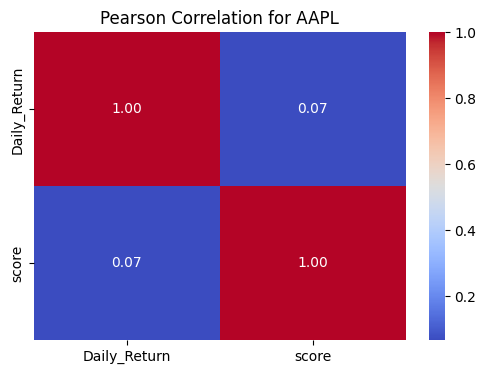

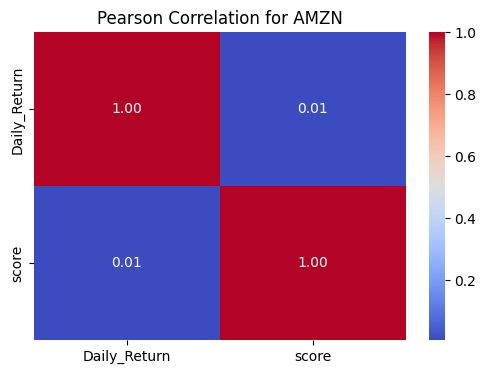

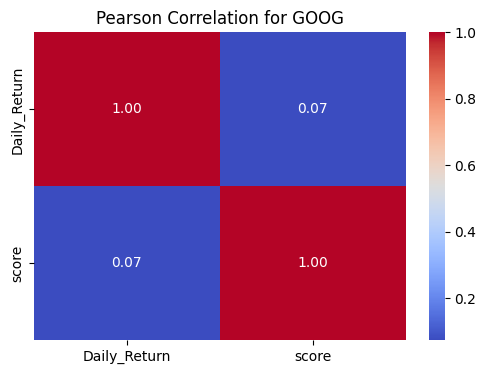

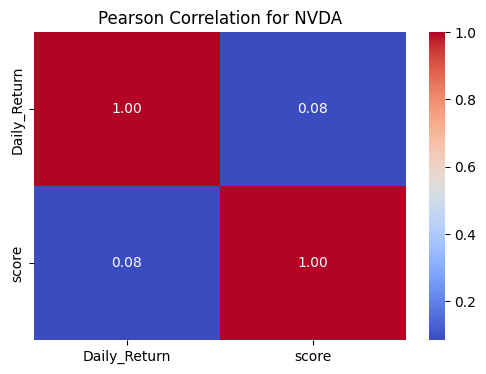

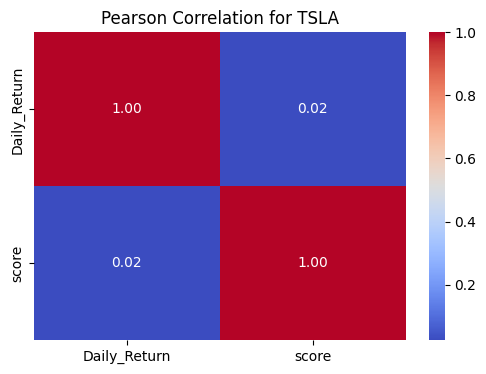

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through the aligned data and plot Pearson correlation
for ticker, data in aligned_data.items():
    # Skip 'META' and 'MSFT'
    if ticker in ['META', 'MSFT']:
        continue  # Skip the rest of the loop for these tickers

    # Select numeric columns for correlation
    numeric_cols = ['Daily_Return', 'score']  # Adjust if more numeric columns exist
    correlation_matrix = data[numeric_cols].corr(method='pearson')  # Pearson correlation

    # Plotting
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title(f'Pearson Correlation for {ticker}')
    plt.show()

In [34]:
import pandas as pd

# Group the news data by 'date' and calculate the average sentiment score for each day
aggregated_sentiment = data_news.groupby('date')['score'].mean().reset_index()

# Display the first few rows of the aggregated sentiment data
print(aggregated_sentiment.head())


         date     score
0  2009-02-14  0.000000
1  2009-04-27  0.000000
2  2009-04-29  0.000000
3  2009-05-22  0.000000
4  2009-05-27  0.234091


In [6]:
# File paths for all the stock datasets
file_paths = [
    r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\AAPL_historical_data.csv",
    r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\AMZN_historical_data.csv",
    r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\GOOG_historical_data.csv",
    r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\MSFT_historical_data.csv",
    r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\NVDA_historical_data.csv",
    r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\TSLA_historical_data.csv",
    r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\META_historical_data.csv",
    r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\raw_analyst_ratings.csv"  # Path to news dataset

]

# Load all datasets into a list using a loop
datasets = [load_data(file) for file in file_paths]

# Display the first 2 rows of the first dataset (AAPL data) as a check
print(datasets[0].head(2))
print(datasets[-1].head(2))  # News dataset


         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
   Unnamed: 0                                    headline  \
0           0     Stocks That Hit 52-Week Highs On Friday   
1           1  Stocks That Hit 52-Week Highs On Wednesday   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  


In [10]:
import pandas as pd

# Function to load the data
def load_data(file_path):
    return pd.read_csv(file_path)

# File paths for AAPL stock data and news dataset
file_paths = [
    r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\AAPL_historical_data.csv",  # AAPL stock data
    r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\raw_analyst_ratings.csv"   # News dataset
]

# Load datasets
data_AAPL = load_data(file_paths[0])  # Stock dataset for AAPL
data_news = load_data(file_paths[1])  # News dataset

# 1. Remove 'Unnamed: 0' column from stock data if it exists
if 'Unnamed: 0' in data_AAPL.columns:
    data_AAPL = data_AAPL.drop(columns=['Unnamed: 0'])

# 2. Convert 'Date' in stock data to ISO 8601 format (YYYY-MM-DD)
data_AAPL['Date'] = pd.to_datetime(data_AAPL['Date'], errors='coerce').dt.strftime('%Y-%m-%d')

# 3. Filter news data for rows where the stock ticker is 'AAPL'
data_news = data_news[data_news['stock'] == 'AAPL']

# 4. Convert 'date' column in news data to ISO 8601 format (YYYY-MM-DD) and remove time
data_news['date'] = pd.to_datetime(data_news['date'], errors='coerce').dt.strftime('%Y-%m-%d')

# 5. Merge the two datasets on 'Date' (stock data) and 'date' (news data)
merged_data = pd.merge(data_AAPL, data_news, left_on='Date', right_on='date', how='inner')

# 6. Sort the merged dataset by Date
merged_data = merged_data.sort_values(by='Date')

# Display the results
print("Filtered and Merged AAPL Data (with ISO 8601 Dates):")
print(merged_data.head())


Filtered and Merged AAPL Data (with ISO 8601 Dates):
         Date       Open       High        Low      Close  Adj Close  \
0  2020-06-09  83.035004  86.402496  83.002502  85.997498  83.889359   
1  2020-06-09  83.035004  86.402496  83.002502  85.997498  83.889359   
2  2020-06-09  83.035004  86.402496  83.002502  85.997498  83.889359   
3  2020-06-09  83.035004  86.402496  83.002502  85.997498  83.889359   
4  2020-06-10  86.974998  88.692497  86.522499  88.209999  86.047615   

      Volume  Dividends  Stock Splits  Unnamed: 0  \
0  147712400        0.0           0.0        7126   
1  147712400        0.0           0.0        7127   
2  147712400        0.0           0.0        7128   
3  147712400        0.0           0.0        7129   
4  166651600        0.0           0.0        7120   

                                            headline  \
0          Why Apple's Stock Is Trading Higher Today   
1  Apple Could Announce In-House Chips For Macs A...   
2  Apple shares are trading

In [11]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon (if not already downloaded)
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to load the data
def load_data(file_path):
    return pd.read_csv(file_path)

# File path for the news dataset
file_path_news = r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\raw_analyst_ratings.csv"

# Load the news dataset
data_news = load_data(file_path_news)

# Step 1: Filter News Data for Stock 'AAPL'
data_news = data_news[data_news['stock'] == 'AAPL']

# Step 2: Perform Sentiment Analysis on News Headlines
def analyze_sentiment(text):
    # Get VADER sentiment scores
    scores = sia.polarity_scores(text)
    compound_score = scores['compound']
    
    # Determine sentiment label based on compound score
    if compound_score > 0.05:
        sentiment_label = 'Positive'
    elif compound_score < -0.05:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    
    return compound_score, sentiment_label

# Apply the sentiment analysis function to each headline
data_news['sentiment_score'], data_news['sentiment_label'] = zip(*data_news['headline'].apply(analyze_sentiment))

# Display the updated DataFrame with sentiment analysis
print("News Data with Sentiment Analysis:")
print(data_news[['date', 'headline', 'sentiment_score', 'sentiment_label']].head())

# Save the updated news data with sentiment analysis
output_path = r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\news_with_sentiment.csv"
data_news.to_csv(output_path, index=False)
print(f"Sentiment analysis results saved to: {output_path}")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\fikad\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


News Data with Sentiment Analysis:
                           date  \
6680  2020-06-10 11:33:26-04:00   
6681  2020-06-10 08:14:08-04:00   
6682  2020-06-10 07:53:47-04:00   
6683  2020-06-10 07:19:25-04:00   
6684  2020-06-10 06:27:11-04:00   

                                               headline  sentiment_score  \
6680  Tech Stocks And FAANGS Strong Again To Start D...           0.5574   
6681      10 Biggest Price Target Changes For Wednesday           0.0000   
6682  Benzinga Pro's Top 5 Stocks To Watch For Wed.,...           0.2023   
6683  Deutsche Bank Maintains Buy on Apple, Raises P...           0.0000   
6684  Apple To Let Users Trade In Their Mac Computer...           0.3818   

     sentiment_label  
6680        Positive  
6681         Neutral  
6682        Positive  
6683         Neutral  
6684        Positive  
Sentiment analysis results saved to: C:\Users\fikad\Desktop\10acedamy\Week_1\Data\news_with_sentiment.csv


In [15]:
import pandas as pd
from textblob import TextBlob

# Load the dataset
file_path = r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\AAPL_historical_data.csv"
data = pd.read_csv(file_path)

# Assuming the dataset has a column 'Headline' containing the news headlines
# Replace 'Headline' with the actual column name from your dataset if necessary
headlines = data['headline']

# Function to calculate sentiment score and label
def analyze_sentiment(text):
    # Perform sentiment analysis using TextBlob
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity  # Sentiment score
    # Determine sentiment label based on polarity score
    if polarity > 0:
        label = 'positive'
    elif polarity < 0:
        label = 'negative'
    else:
        label = 'neutral'
    return polarity, label

# Apply sentiment analysis to each headline
sentiment_scores = [analyze_sentiment(headline) for headline in headlines]

# Create new columns for sentiment score and label
data['Sentiment_Score'] = [score[0] for score in sentiment_scores]
data['Sentiment_Label'] = [score[1] for score in sentiment_scores]

# Save the updated dataframe to a new CSV file
output_file_path = r"C:\Users\fikad\Desktop\10acedamy\Week_1\Data\AAPL_historical_data_with_sentiment.csv"
data.to_csv(output_file_path, index=False)

# Check the first few rows of the updated dataset
print(data.head())


KeyError: 'headline'